In [4]:
import pandas as pd
import numpy as np

import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

import spacy
nlp = spacy.load("en_core_web_sm", disable=["tagger","parser", "ner"])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from src.preprocess import clean_text, lemmatize_text

## Clean and Pre-process data

In [5]:
data = pd.read_csv("data/dev_data.csv")
data['process_text'] = data['text'].apply(lambda x: clean_text(x))
data['process_text'] = lemmatize_text(data['process_text'])

# data = pd.read_csv("data/lemmatized_dev_data.csv")

print(data.head())

emotions = data['label'].unique().tolist()
emotions.sort()
emotions

332933it [06:57, 797.58it/s]


                                                text    label  \
0  i usually wear my hair in a twist out and when...      joy   
1  i feel so irritated and rejected by it or is g...    anger   
2                  i can feel it disturbed within me  sadness   
3  im talking about down right i feel like slappi...    anger   
4  i almost feel like im messing with a precious ...      joy   

                                        process_text  
0  i usually wear my hair in a twist out and when...  
1  i feel so irritated and rejected by it or is g...  
2                  i can feel it disturbed within me  
3  i m talking about down right i feel like slapp...  
4  i almost feel like i m messing with a precious...  


['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [6]:
# add the top 10 really common words to stopwords list
tmp_dict = WordCloud().process_text(" ".join(data['process_text']))
tmp_dict = sorted(tmp_dict.items(), key=lambda kv: kv[1])
tmp_dict.reverse()
tmp_dict = dict(tmp_dict)

stop_words.extend([key for key,value in tmp_dict.items()][:30])
stop_words.extend(['feel','think', 'like', 'would', 'really', 'get', 'still'])

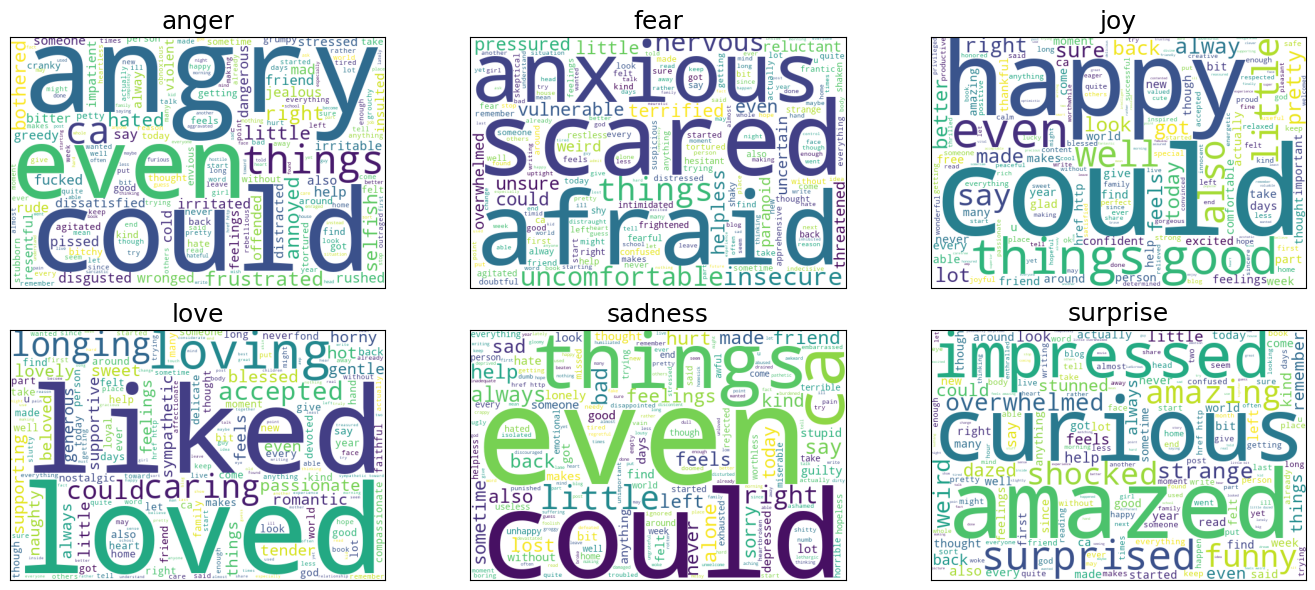

In [9]:
fig, axs = plt.subplots(figsize= (14,6), ncols = 3, nrows= 2)

wc_generator = WordCloud(width= 600, height= 400, background_color ='white', stopwords= stop_words)

i = j = 0

for ee in emotions:
    # create dictionary of frequencies of words
    tmp_data = data.query(f"label == '{ee}'")['process_text']
    # remove any words that have a frequency of more than 5000
    tmp_dict = wc_generator.process_text(" ".join(tmp_data))
    tmp_dict = {key:val for key, val in tmp_dict.items() if val < 5000 }
    
    wordcloud = wc_generator.generate_from_frequencies(tmp_dict)
    axs[i,j].imshow(wordcloud)
    axs[i,j].set_title(ee, fontsize = 18)
    axs[i,j].get_yaxis().set_visible(False)
    axs[i,j].get_xaxis().set_visible(False)

    # increment column number
    j += 1

    # if more than 1 column, increase the row number
    if j == 3:
        i += 1
        j = 0


plt.tight_layout();
fig.savefig("images/wordclouds.png")